In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  \
664  665.0  492.04               29.0                24.8                 8.0   
665  666.0  454.02               27.0                23.0                 7.6   
666  667.0  480.56               27.1                22.8                 7.5   
667  668.0  412.75               25.7                22.0                 7.5   
668  669.0  471.80               27.2                23.4                 7.4   
669  670.0  382.79               25.4                21.5                 7.5   
670  671.0  401.90               26.5                22.3                 7.2   
671  672.0  441.98               27.8                23.4                 7.5   
672  673.0  468.54               28.0                23.5                 7.8   
673  674.0  418.14               26.3                22.2                 7.4   

     altura  espessura       data  
664     9.1        3.2 2024-06-12  
665     9.0        3.2 2024-06-12  


In [3]:
# Dropping the columns
df2 = df.drop(columns=[
'data', 
'Index',
'espessura'
])
df2.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura
0,51.45,14.3,12.2,4.0,4.1
1,37.15,12.4,10.9,3.8,3.2
2,47.26,13.7,11.2,3.4,4.0
3,36.67,12.9,11.1,3.7,3.7
4,45.48,13.2,11.3,3.8,4.5


In [4]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [5]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df2,  target = 'peso')
best_model = exp2.compare_models()

,Description,Value
0,Session id,1687
1,Target,peso
2,Target type,Regression
3,Original data shape,"(674, 5)"
4,Transformed data shape,"(674, 5)"
5,Transformed train set shape,"(471, 5)"
6,Transformed test set shape,"(203, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,11.4172,403.0420,19.1577,0.9724,0.0807,0.0603,0.0550
et,Extra Trees Regressor,11.5303,427.0734,19.5889,0.9709,0.0832,0.0611,0.0550
lightgbm,Light Gradient Boosting Machine,11.8844,446.3488,20.2015,0.9699,0.0817,0.0612,0.0790
gbr,Gradient Boosting Regressor,11.5945,448.0756,20.0805,0.9696,0.0789,0.0593,0.0310
xgboost,Extreme Gradient Boosting,12.6881,523.6984,21.8093,0.9645,0.0899,0.0664,0.0950
ada,AdaBoost Regressor,16.2024,600.4709,24.0178,0.9595,0.1328,0.1081,0.0210
dt,Decision Tree Regressor,14.9466,681.9978,25.1067,0.9548,0.1041,0.0784,0.0080
llar,Lasso Least Angle Regression,21.5517,756.8244,27.1814,0.9494,0.5417,0.2081,0.0120
lasso,Lasso Regression,21.5592,757.4760,27.1916,0.9493,0.5417,0.2082,0.0300
lr,Linear Regression,21.1187,760.5540,27.1626,0.9491,0.5301,0.2028,0.5980


In [7]:
rf = exp2.create_model('rf')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:46:19
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.3527,640.3098,25.3043,0.9597,0.0969,0.0743
1,15.3606,1025.4158,32.0221,0.9242,0.1349,0.0821
2,13.5481,560.4248,23.6733,0.9584,0.0879,0.0600
3,6.7035,119.7335,10.9423,0.9907,0.0519,0.0414
4,13.6463,458.1568,21.4046,0.9726,0.0786,0.0605
5,9.6179,269.2521,16.4089,0.9816,0.0682,0.0504
6,9.4450,271.3635,16.4731,0.9850,0.0651,0.0498
7,9.8927,241.2123,15.5310,0.9814,0.0764,0.0615
8,9.4921,224.6782,14.9893,0.9879,0.0652,0.0530


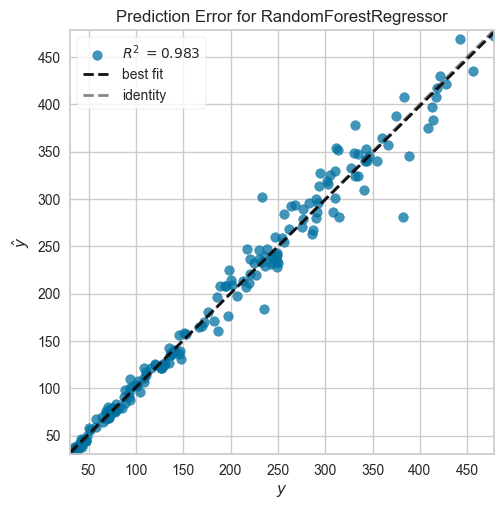

In [8]:
exp2.plot_model(rf, plot = 'error')

In [9]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,9.4735,241.4704,15.5393,0.9826,0.0674,0.0517


,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,peso,prediction_label
403,23.000000,19.900000,6.3,7.7,310.239990,301.507307
578,22.000000,18.799999,5.5,6.7,242.850006,238.460497
396,19.500000,17.000000,5.5,6.0,186.740005,160.536102
667,25.700001,22.000000,7.5,8.2,412.750000,397.653801
173,15.500000,13.400000,4.1,4.5,78.790001,76.578399


In [ ]:
### Saving model 

#save_model(rf, 'rf_weight') 


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['comprimento_Total',
                                              'comprimento_Padrao',
                                              'comprimento_Cabeca', 'altura'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=8604))]),
 'rf_weight.pkl')

In [ ]:
################### LOADING MODEL
saved_rf = load_model('rf_weight') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeca', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=8604))])

In [ ]:
exp2.predict_model(saved_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,5.7390,75.1253,8.6675,0.9844,0.0585,0.0469


,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,peso,prediction_label
310,18.600000,16.200001,5.1,5.5,141.240005,134.673602
183,15.700000,13.500000,4.0,4.6,76.629997,75.622801
390,20.799999,18.000000,6.0,6.8,216.149994,206.631199
81,11.900000,10.000000,3.1,3.9,37.779999,33.515799
260,19.200001,16.299999,4.8,5.4,148.199997,141.540898
...,...,...,...,...,...,...
344,17.799999,15.300000,5.0,5.2,112.050003,121.647966
149,14.400000,12.700000,4.0,4.6,65.550003,63.919449
112,13.200000,11.000000,3.2,3.9,39.990002,40.667999
351,18.799999,16.100000,5.1,5.4,144.789993,136.345800


In [ ]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)